In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_new = pd.read_csv("EDA.csv")
df_new

,Unnamed: 0,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,date,month,year,City_encoded
0,0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,108.70,0.00,0.02,118.0,1,1,2015,1
1,1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2,1,2015,1
2,2,48.57,95.68,17.40,19.30,29.70,15.85,3.90,29.07,30.70,6.80,16.40,118.0,3,1,2015,1
3,3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,4,1,2015,1
4,4,48.57,95.68,22.10,21.42,37.76,15.85,3.90,36.97,39.31,7.01,18.89,118.0,5,1,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,27,6,2020,26
29527,29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,28,6,2020,26
29528,29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,29,6,2020,26
29529,29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,30,6,2020,26


In [3]:
df_new.columns

Index(['Unnamed: 0', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'date', 'month', 'year',
       'City_encoded'],
      dtype='object')

In [4]:
df_new.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df_new

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,date,month,year,City_encoded
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,108.70,0.00,0.02,118.0,1,1,2015,1
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2,1,2015,1
2,48.57,95.68,17.40,19.30,29.70,15.85,3.90,29.07,30.70,6.80,16.40,118.0,3,1,2015,1
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,4,1,2015,1
4,48.57,95.68,22.10,21.42,37.76,15.85,3.90,36.97,39.31,7.01,18.89,118.0,5,1,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,27,6,2020,26
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,28,6,2020,26
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,29,6,2020,26
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,30,6,2020,26


# Feature Selection And Transformation¶

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
corr = df_new.corr()
corr_target = abs(corr['AQI'])

In [8]:
# Select features with correlation greater than a threshold value
selected_features = corr_target[corr_target > 0.5]

In [9]:
print(selected_features)

PM2.5    0.812386
PM10     0.538811
NO       0.507500
NO2      0.521157
CO       0.555276
AQI      1.000000
Name: AQI, dtype: float64


# Using SelectKBest chi2

In [10]:
df_new

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,date,month,year,City_encoded
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,108.70,0.00,0.02,118.0,1,1,2015,1
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2,1,2015,1
2,48.57,95.68,17.40,19.30,29.70,15.85,3.90,29.07,30.70,6.80,16.40,118.0,3,1,2015,1
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,4,1,2015,1
4,48.57,95.68,22.10,21.42,37.76,15.85,3.90,36.97,39.31,7.01,18.89,118.0,5,1,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,27,6,2020,26
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,28,6,2020,26
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,29,6,2020,26
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,30,6,2020,26


In [11]:
X = df_new.drop('AQI',axis=1)
y = df_new['AQI']

In [12]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [13]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [14]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

In [15]:
featureScores

,Specs,Score
0,PM2.5,705295.850646
1,PM10,316537.623073
2,NO,101001.481801
3,NO2,137290.381297
4,NOx,141555.359379
...,...,...
10,Toluene,45193.623405
11,date,2488.906611
12,month,1605.718585
13,year,5.259139


In [16]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

      Specs          Score
0     PM2.5  705295.850646
1      PM10  316537.623073
4       NOx  141555.359379
3       NO2  137290.381297
2        NO  101001.481801
10  Toluene   45193.623405
8        O3   41630.255344
7       SO2   40629.125216
5       NH3   22689.312514
9   Benzene   11233.325497


# Correlation Matrix with Heatmap

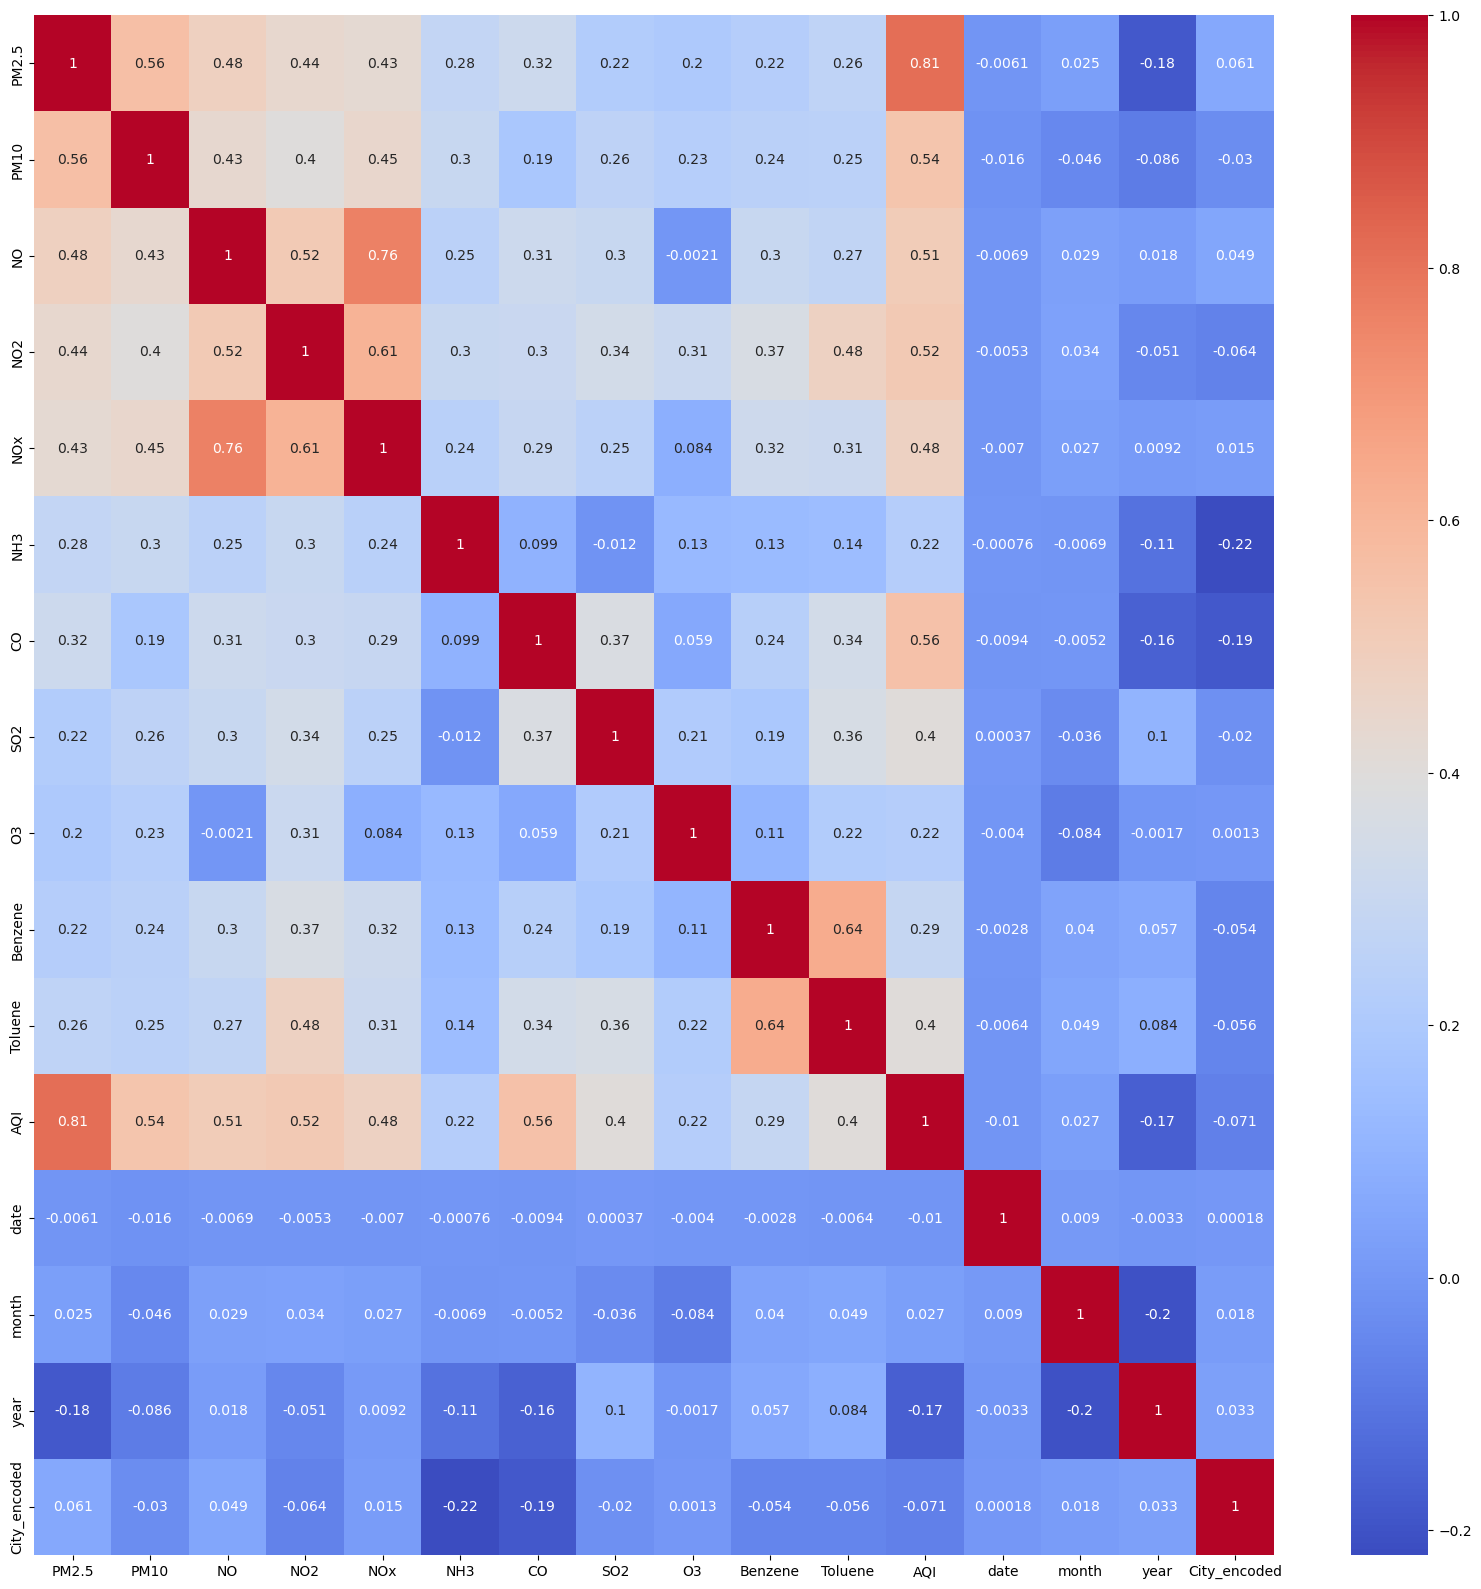

In [17]:
plt.figure(figsize=(20,20))

corr_matrix = df_new.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

# Show the plot
plt.show()

# Embedded Method (Lasso Regression)


In [18]:
from sklearn.linear_model import LassoCV

In [19]:
# Use LassoCV for feature selection
model = LassoCV(cv=5)
model.fit(X, y)

# Display selected features
print("Selected Features: %s" % np.where(model.coef_ != 0)[0])

Selected Features: [ 0  1  2  3  4  5  6  7  8 10 12 13 14]


# Model Creation

In [20]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [21]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((23624, 15), (5907, 15))

## Create an Evaluate Function to give all metrics after model Training

In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 45.9002
- Mean Absolute Error: 30.4932
- R2 Score: 0.7963
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45.0959
- Mean Absolute Error: 30.3815
- R2 Score: 0.8018


Lasso
Model performance for Training set
- Root Mean Squared Error: 45.9228
- Mean Absolute Error: 30.4294
- R2 Score: 0.7961
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45.0717
- Mean Absolute Error: 30.2818
- R2 Score: 0.8021


Ridge
Model performance for Training set
- Root Mean Squared Error: 45.9002
- Mean Absolute Error: 30.4932
- R2 Score: 0.7963
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45.0958
- Mean Absolute Error: 30.3814
- R2 Score: 0.8018


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 29.7367
- Mean Absolute Error: 16.5733
- R2 Score: 0.9145
---------

# Support Vector Regressor

In [24]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_svr)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_svr)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_svr))}")
print(f"Score = {svr.score(X_test,y_test)}")

Mean Absolute Error = 52.68003650059931
Mean Squared Error = 7841.056414526258
Root mean Squared Error = 88.54973977672807
Score = 0.23597403855591892


# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_lr)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_lr)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_lr))}")
print(f"Score = {lr.score(X_test,y_test)}")

Mean Absolute Error = 30.3814892887348
Mean Squared Error = 2033.6357596068676
Root mean Squared Error = 45.09585080256129
Score = 0.8018442370109415


In [27]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_lasso)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_lasso)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_lasso))}")
print(f"Score = {lasso.score(X_test,y_test)}")

Mean Absolute Error = 30.281827405650365
Mean Squared Error = 2031.4614577192933
Root mean Squared Error = 45.071736795017046
Score = 0.8020560991634758


In [28]:
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_ridge)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_ridge)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_ridge))}")
print(f"Score = {ridge.score(X_test,y_test)}")

Mean Absolute Error = 30.381395150974054
Mean Squared Error = 2033.630021695737
Root mean Squared Error = 45.09578718345802
Score = 0.8018447961081903


# Decison Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
dt_reg.fit(X_train,y_train)
y_pred_dt_reg = dt_reg.predict(X_test)

print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_dt_reg)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_dt_reg)}")
print(f"Root mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_dt_reg))}")
print(f"Score = {dt_reg.score(X_test,y_test)}")

Mean Absolute Error = 25.32977822921957
Mean Squared Error = 2248.3384120534956
Root mean Squared Error = 47.41664699294432
Score = 0.7809237906083072


In [30]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [31]:
test_model(dt_reg)

[0.7969734916682053]

# RandomForestRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
y_pred = reg_rf.predict(X_test)

In [35]:
reg_rf.score(X_train, y_train)

0.9858801968613828

In [36]:
reg_rf.score(X_test, y_test)

0.9001356978829901

In [40]:
test_model(reg_rf)

[0.8947035222057124]

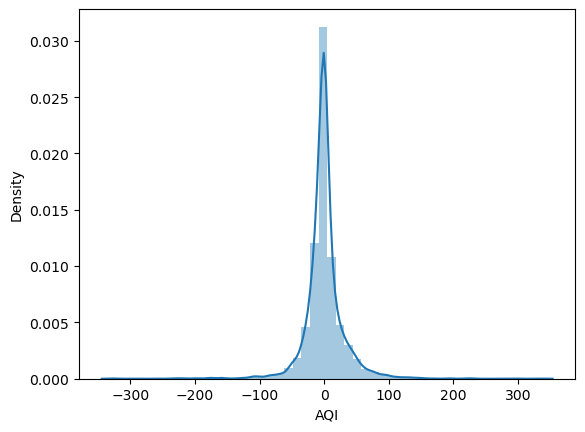

In [37]:
sns.distplot(y_test-y_pred)
plt.show()

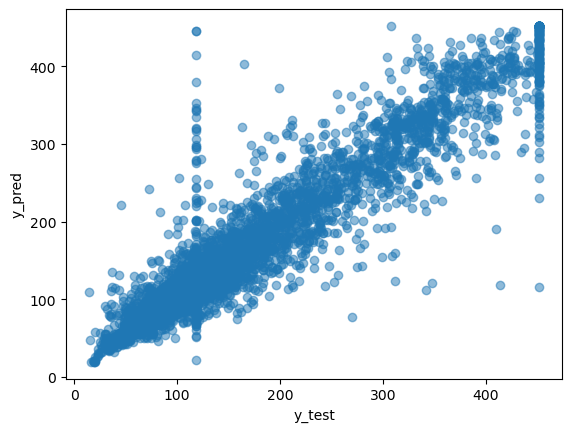

In [38]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [41]:
from sklearn import metrics

In [42]:
metrics.r2_score(y_test, y_pred)

0.9001356978829901

# Hyperparameter Tuning


In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [45]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [46]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [47]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  26.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  26.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [63]:
prediction = rf_random.predict(X_test)

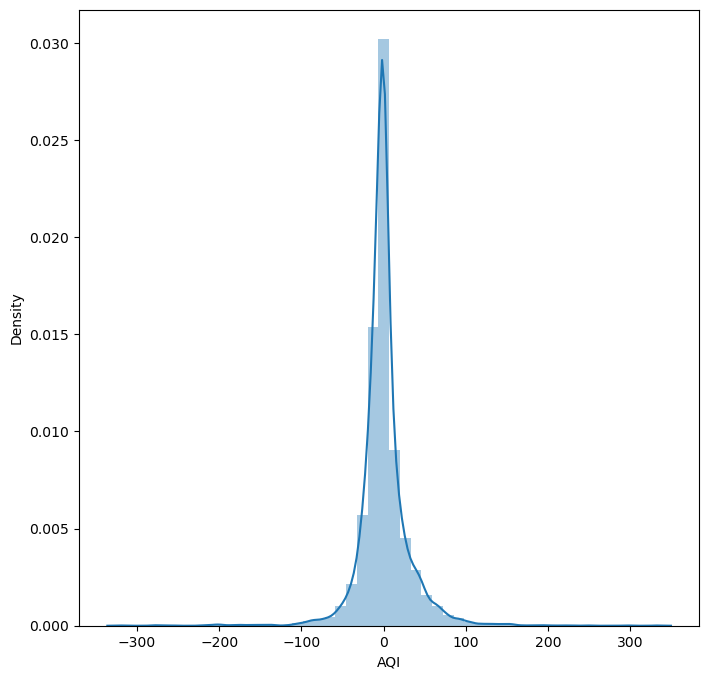

In [64]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

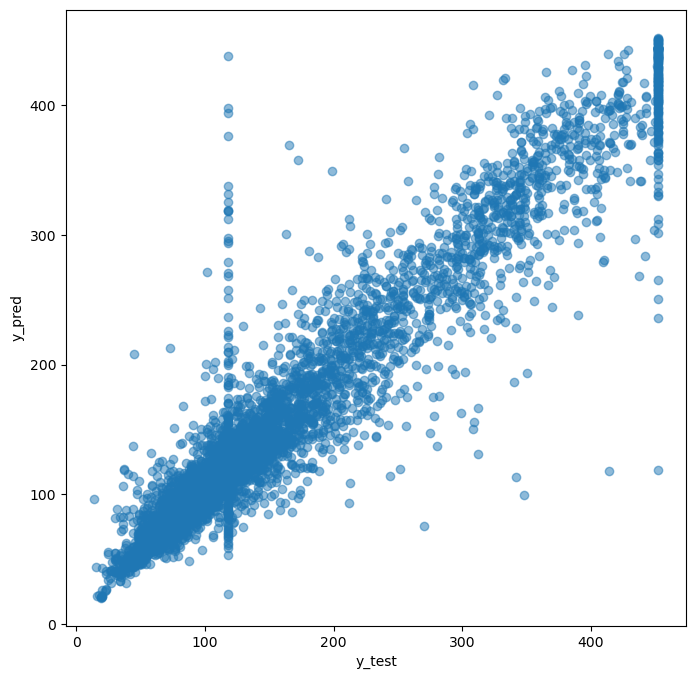

In [65]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 17.57027642141126
MSE: 942.37554724421
RMSE: 30.698135892008327


In [ ]:
test_model(rf_random)